<a href="https://colab.research.google.com/github/Tveralina/Artificial_Intelligence/blob/master/NumPy_(1.3)_Tverkaeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from PIL import Image
from numpy import *
im_1 = array(Image.open('/content/drive/MyDrive/Colab Notebooks/DSC5900.jpg'))
print (im_1.shape, im_1.dtype)

(801, 1200, 3) uint8


In [40]:
im_2 = array(Image.open('/content/drive/MyDrive/Colab Notebooks/DSC5900.jpg').convert('L'),'f')
print (im_2.shape, im_2.dtype)

(801, 1200) float32


0 255
0 255


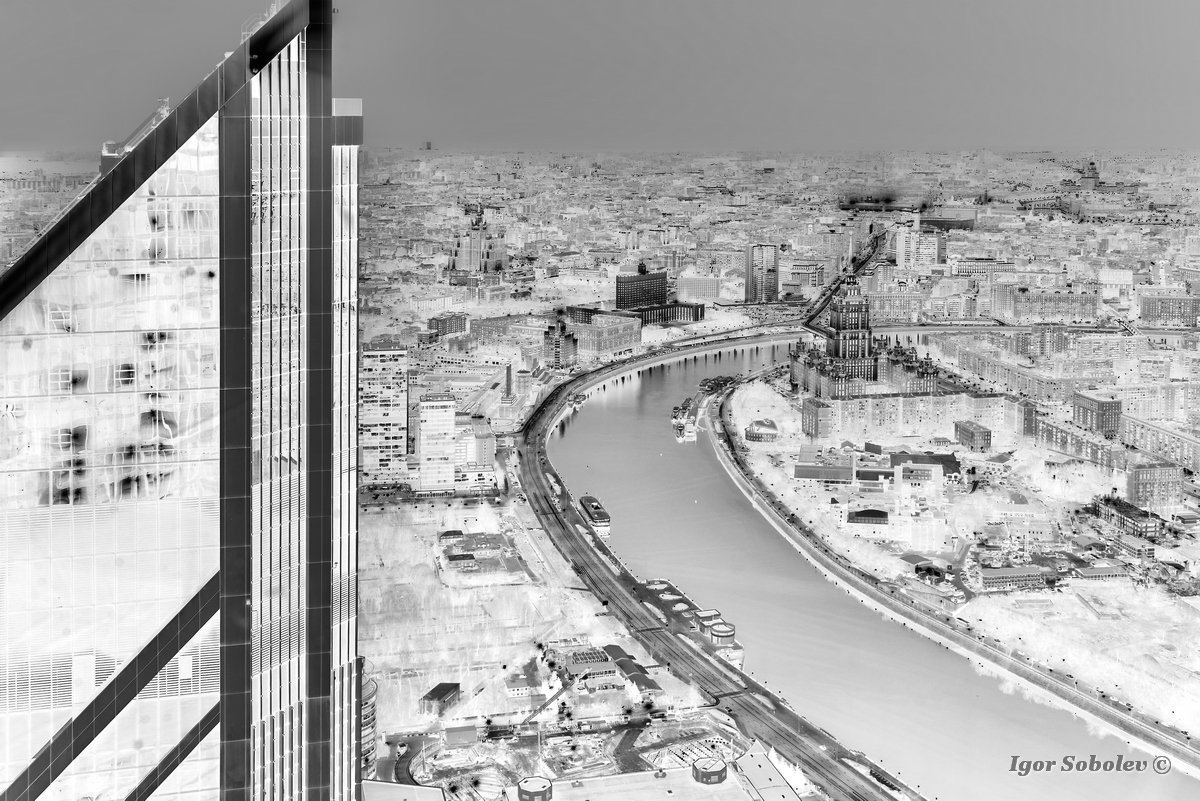

100 200


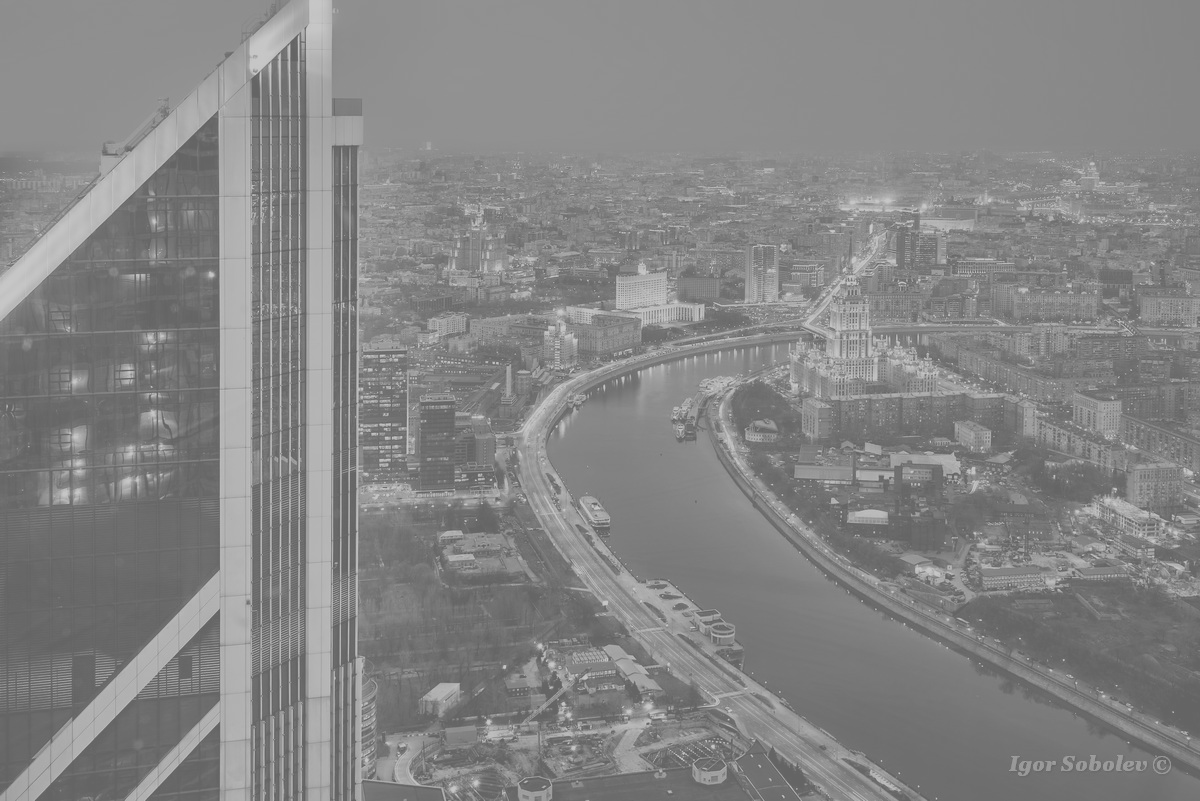

0 255


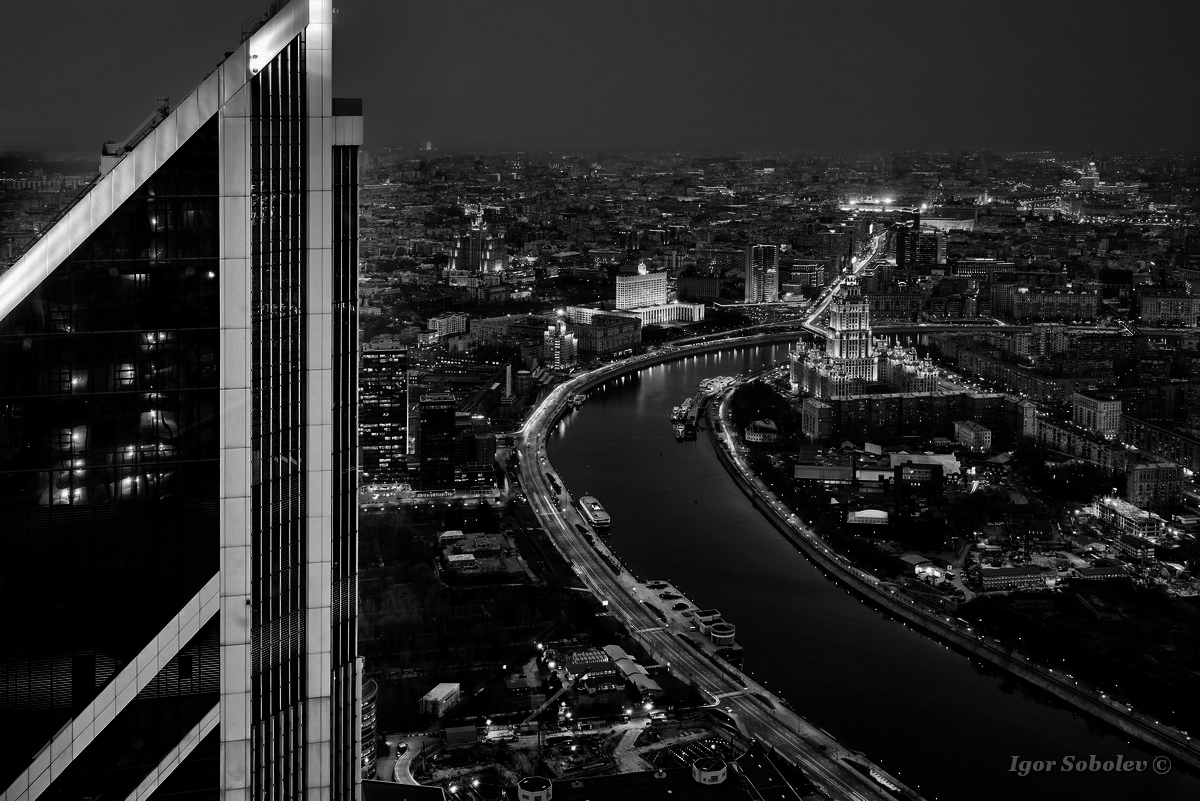

In [41]:
im_3 = array(Image.open('/content/drive/MyDrive/Colab Notebooks/DSC5900.jpg').convert('L'))

# Инвертирование изображения
im_inv = 255 - im_3
img_inv = Image.fromarray(uint8(im_inv))
img_inv.save('/content/drive/MyDrive/Colab Notebooks/DSC5900_im_inv.jpg')

# Приведение к интервалу 100...200
im_int = (100.0/255) * im_3 + 100
img_int = Image.fromarray(uint8(im_int))
img_int.save('/content/drive/MyDrive/Colab Notebooks/DSC5900_im_int.jpg')

# Применение квадратичной функции
im_qv = 255.0 * (im_3/255.0)**2
img_qv = Image.fromarray(uint8(im_qv))
img_qv.save('/content/drive/MyDrive/Colab Notebooks/DSC5900_im_qv.jpg')

# Минимальное и максимальное значение яркости
print (int(im_3.min()), int(im_3.max()))
print (int(im_inv.min()), int(im_inv.max()))
display(img_inv)
print (int(im_int.min()), int(im_int.max()))
display(img_int)
print (int(im_qv.min()), int(im_qv.max()))
display(img_qv)

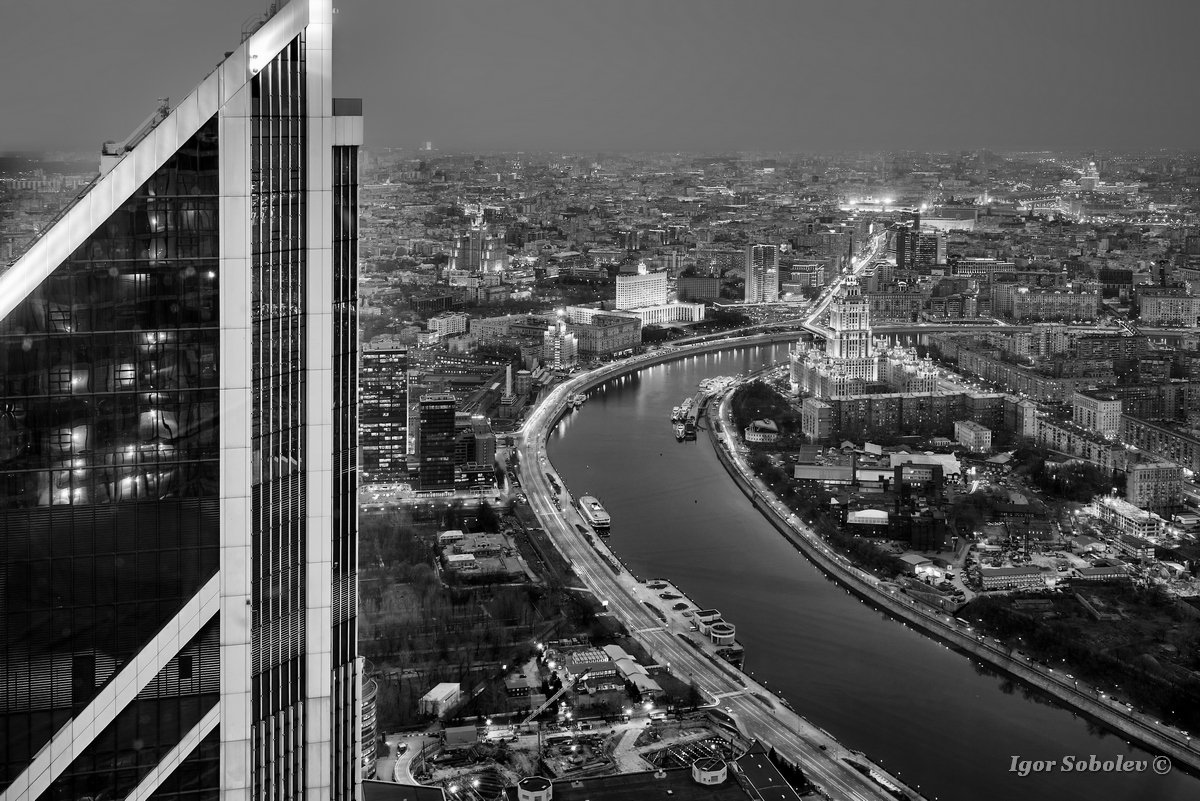

In [42]:
pil_im = Image.fromarray(im_3)
pil_im = Image.fromarray(uint8(im_3))
pil_im

In [43]:
def imresize(im_1,sz):
# Изменение массива с помощью PIL
  pil_im = Image.fromarray(uint8(im_1))
  return array(pil_im.resize(sz))

In [44]:
def histeq(im: array, nbr_bins=256):
# Получение гистограммы изображения
  im_hist,bins = histogram(im.flatten(),nbr_bins,normed=True)
  # Функция распределения
  cdf = im_hist.cumsum()
  # Нормирование
  cdf = 255 * cdf / cdf[-1]
  # Исп. линейной интерполяции cdf для нахождения значений новых пикселей
  im_inv = interp(im.flatten(),bins[:-1],cdf)
  return im_inv.reshape(im.shape), cdf

In [45]:
im_inv,cdf = histeq(im_1)
im_inv
cdf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


array([  3.96542863,   4.97133271,   6.04028818,   7.17362151,
         8.38371307,   9.62590512,  10.89701415,  12.25735019,
        13.68109134,  15.17752289,  16.71206825,  18.31276009,
        19.94997399,  21.62804307,  23.3400697 ,  25.06155847,
        26.78225135,  28.52390241,  30.3113608 ,  32.07724199,
        33.86302018,  35.62704432,  37.39442884,  39.16977216,
        40.89868914,  42.63370787,  44.4031263 ,  46.19695173,
        47.99404911,  49.78133063,  51.53306284,  53.26410216,
        54.99699854,  56.69903246,  58.39142738,  60.08727112,
        61.71944444,  63.36231794,  64.92834478,  66.49463691,
        68.05297025,  69.56859134,  71.06900229,  72.57905223,
        74.08662609,  75.58013941,  77.1000052 ,  78.60466084,
        80.11559509,  81.60725135,  83.06521536,  84.5363556 ,
        86.02871931,  87.48403038,  88.92333541,  90.34238972,
        91.74614544,  93.15281939,  94.56205784,  95.99057428,
        97.37858926,  98.78172597, 100.19503225, 101.66

In [46]:
# Вычесление среднего списка изображений
def compute_average(imlist):
  # Открыть первое изображение и преобразовать в массив типа float
  averageim = array(Image.open(imlist[0]), 'f')

  for imname in imlist[1:]:
    try:
      averageim += array(Image.open(imnane))
    except:
      print (imname + '...пропушено')
      averageim /= len(imlist)

  # Вернуть среднее в виде массива значений типа unit8
  return array(averageim, 'unit8')

In [47]:
# Метод главных компонент
def pca(X):
  # Получить количество измерений
  num_data, dim = X.shape
  # Центрировать данные
  mean_X = X.mean(axis=0)
  X = X - mean_X

  if dim/num_data:
    # PCA с компактным трюком
    M = dot(X,X.T)  # Ковариационная матрица
    e,EV = linalg.eigh(M)  # Собственные значения и собственные векторы
    tmp = dot(X.T,EV).T # Компактный трюк
    V = tmp[::-1] # Изменение порядка (так как нужны посл. собств. векторы)
    S = sqrt(e)[::1] # Изменение порядка 
    for i in range(V.shape[1]):
      V[:,i] /= S
    else:
      #
      U,S,V = linalg.svd(X)
      V = V[:num_data]
      # Возвращение матрицы проекции, дисперсии и среднего
      return V,S,mean_X